# Homework 1

In [1]:
library(Stat2Data)
library(lattice)
library(psych)
library(mosaic)

Warning message:
“package ‘mosaic’ was built under R version 3.4.3”Loading required package: dplyr
Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggformula
Warning message:
“package ‘ggformula’ was built under R version 3.4.3”Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Warning message:
“package ‘mosaicData’ was built under R version 3.4.3”Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional fe

In [2]:
data(BaseballTimes)
head(BaseballTimes)

Game,League,Runs,Margin,Pitchers,Attendance,Time
CLE-DET,AL,14,6,6,38774,168
CHI-BAL,AL,11,5,5,15398,164
BOS-NYY,AL,10,4,11,55058,202
TOR-TAM,AL,8,4,10,13478,172
TEX-KC,AL,3,1,4,17004,151
OAK-LAA,AL,6,4,4,37431,133


## Problem 1.27

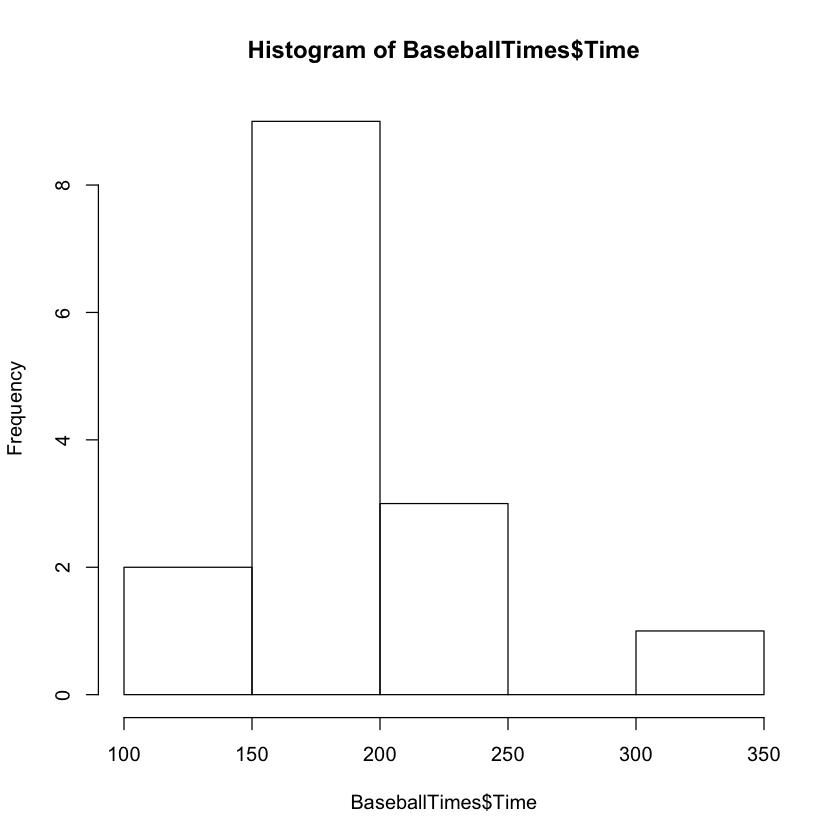

In [3]:
hist(BaseballTimes$Time)

### a.1) The distribution is right skewed (you can see that there is positive skew in the summary stats below)

In [4]:
describe(BaseballTimes)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Game*,1,15,8.000000,4.472136e+00,8,8.000000,5.9304,1,15,14,0.0000000,-1.4413333,1.1547005
League*,2,15,1.533333,5.163978e-01,2,1.538462,0.0000,1,2,1,-0.1204928,-2.1133333,0.1333333
Runs,3,15,10.133333,5.914470e+00,10,9.692308,5.9304,3,23,20,0.5484525,-0.6484896,1.5271095
Margin,4,15,3.866667,3.090693e+00,4,3.461538,4.4478,1,12,11,0.9970121,0.5823349,0.7980134
Pitchers,5,15,8.200000,3.858201e+00,7,7.923077,4.4478,4,16,12,0.5198489,-1.0995397,0.9961832
Attendance,6,15,29768.800000,1.227933e+04,30395,29076.615385,15902.3676,13478,55058,41580,0.3449801,-1.0221847,3170.5087112
Time,7,15,182.666667,4.620554e+01,168,176.153846,25.2042,133,317,184,1.5983669,2.0755231,11.9302204


### a.2) Below is the outlier

In [5]:
# Get the indices of all rows where the Time column has a value > 300
# Pass that to the index operator [] and you'll get just the rows for those indices
# You can pass a vector of column names as the second argument to the index operator ([])
# if you want only those columns, as it is we get all columns back 
BaseballTimes[(BaseballTimes$Time > 300), ]

,Game,League,Runs,Margin,Pitchers,Attendance,Time
15,NYM-PHI,NL,15,1,16,45204,317


### a.3) My explanation is that since there was a margin of 1, it is possible that they went into extra innings and the game only ended once one of the teams scored (which happened to take a decent amount of time). Also, Pitchers would explain it as well because it takes game time to switch out pitchers 

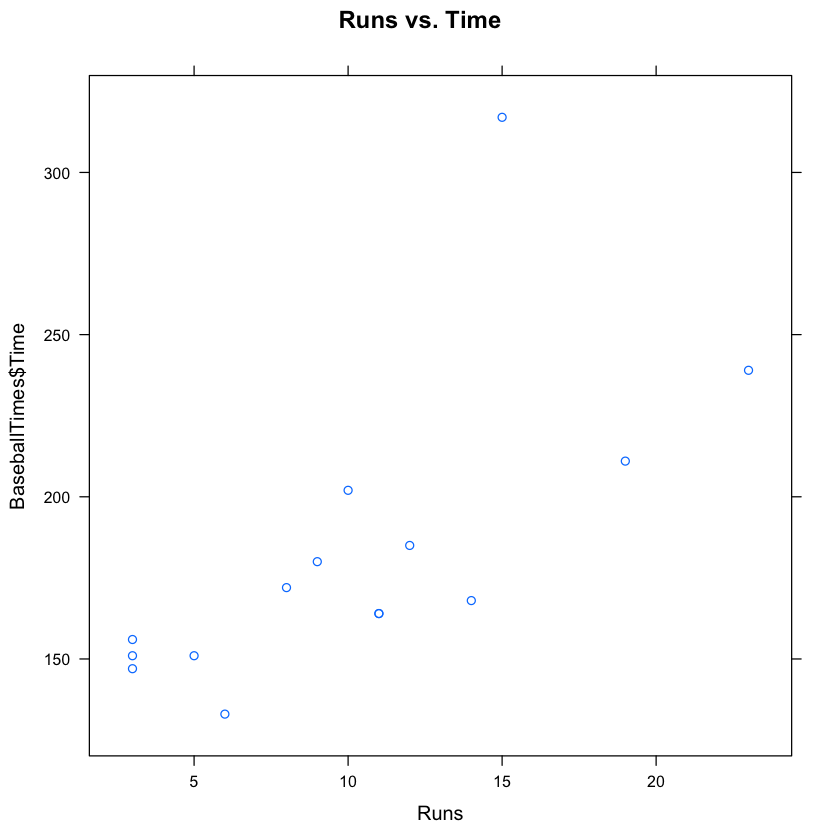

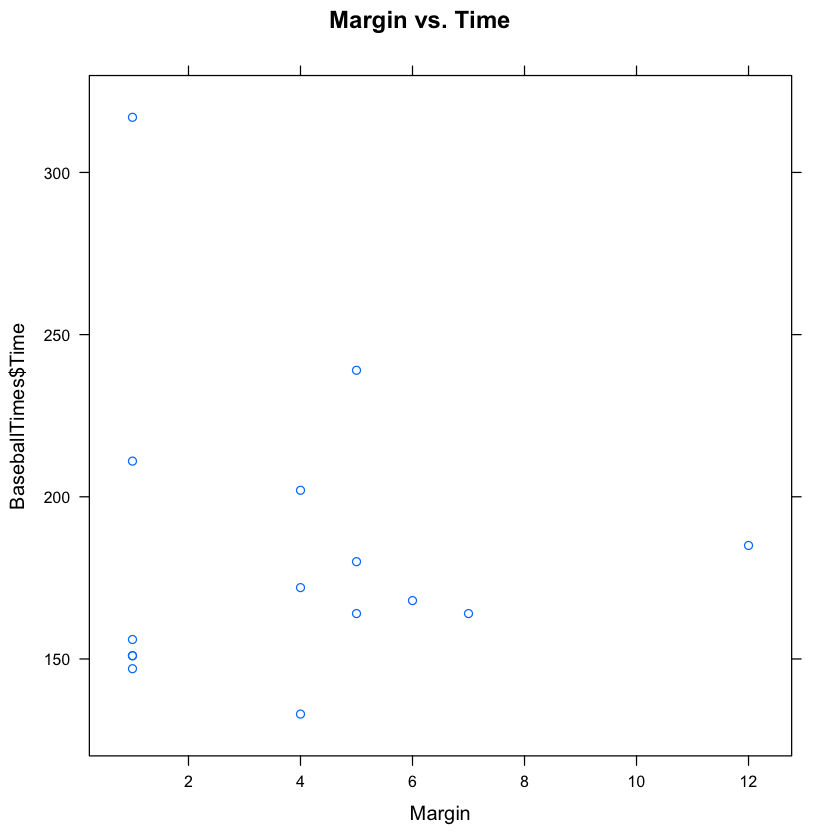

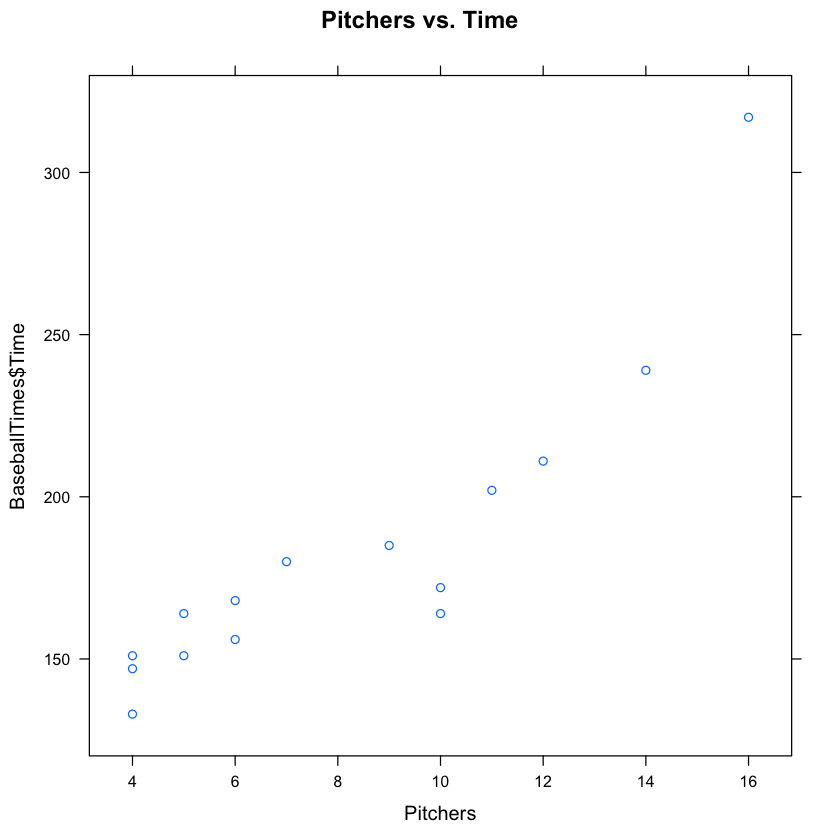

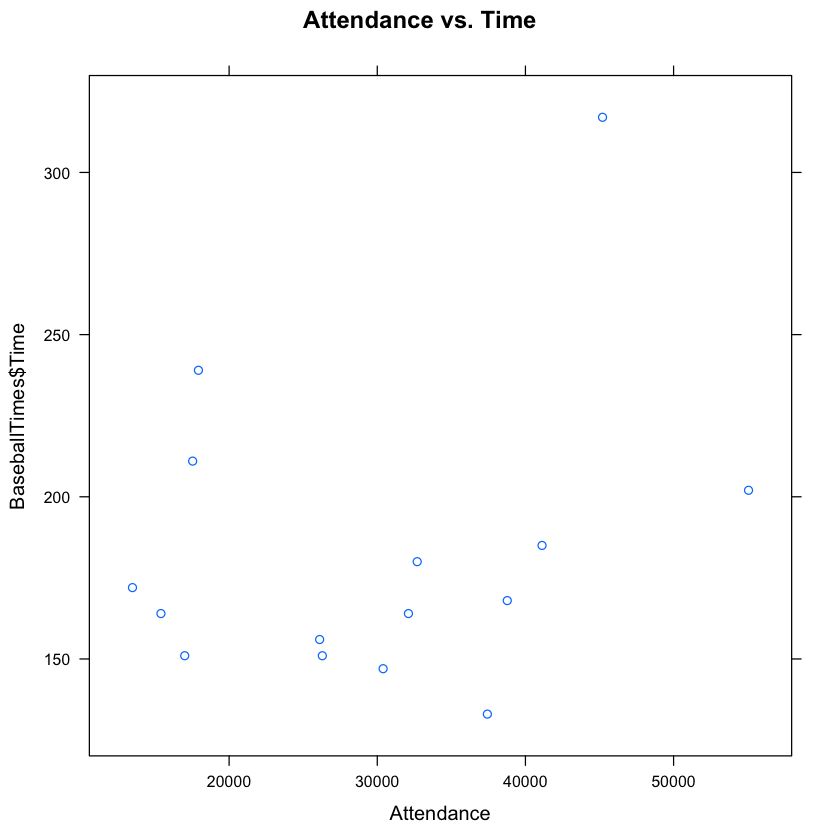

In [7]:
# xyplot(BaseballTimes$Time ~ BaseballTimes$Pitchers, main='Pitchers vs Time')
columns = colnames(BaseballTimes)
par(mfrow=c(1,3))
par(pin=c(2,2))
for(col in columns) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(xyplot(BaseballTimes$Time ~ BaseballTimes[[col]], 
              main=paste(col, 'vs. Time'), xlab=col))
    }
}
# print(cor(BaseballTimes$Time, BaseballTimes$Pitchers))

### b) The best predictor seems to be the Pitchers field because it is linear and there is a strong positive, relatively linear association

In [12]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
pitchersTimeLm


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Coefficients:
           (Intercept)  BaseballTimes$Pitchers  
                 94.84                   10.71  


# c) Regression equation: $\hat{y} = 94.84 + 10.71x$
# The slope coefficient means that time will increase by 10.71 minutes per Pitcher change. The intercept means that if no pitchers switched in the game, then the game would last on average 94.84 minutes

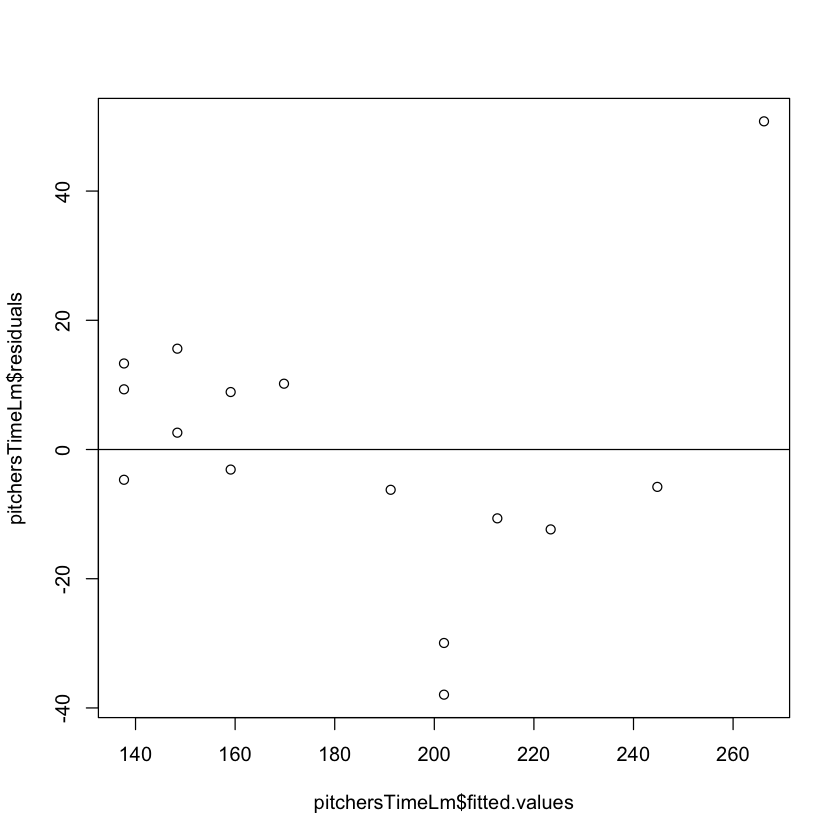

In [14]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

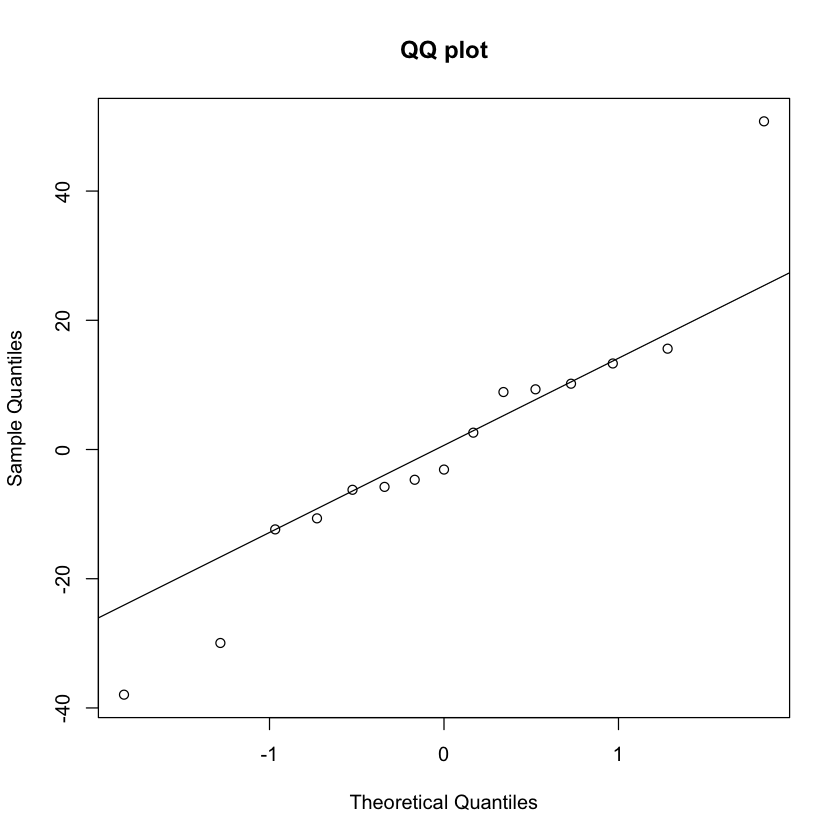

In [13]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

### d) The tails of the QQ plot do not follow the normal line. So we can conclude that the normality condition for the residuals is not met. The fitted vs residuals plot indicates a zero mean on the residuals. 

## Problem 1.28

### a) The outlier found in problem 1.27 also has the largest residual for the model used in problem 1.27 

In [29]:
BaseballTimes$Id <- seq.int(nrow(BaseballTimes))

In [31]:
BaseballTimes <- BaseballTimes[ !(BaseballTimes$Id %in% c(15)), ]

In [32]:
BaseballTimes

Game,League,Runs,Margin,Pitchers,Attendance,Time,Id
CLE-DET,AL,14,6,6,38774,168,1
CHI-BAL,AL,11,5,5,15398,164,2
BOS-NYY,AL,10,4,11,55058,202,3
TOR-TAM,AL,8,4,10,13478,172,4
TEX-KC,AL,3,1,4,17004,151,5
OAK-LAA,AL,6,4,4,37431,133,6
MIN-SEA,AL,5,1,5,26292,151,7
CHI-PIT,NL,23,5,14,17929,239,8
LAD-WAS,NL,3,1,6,26110,156,9
FLA-ATL,NL,19,1,12,17539,211,10


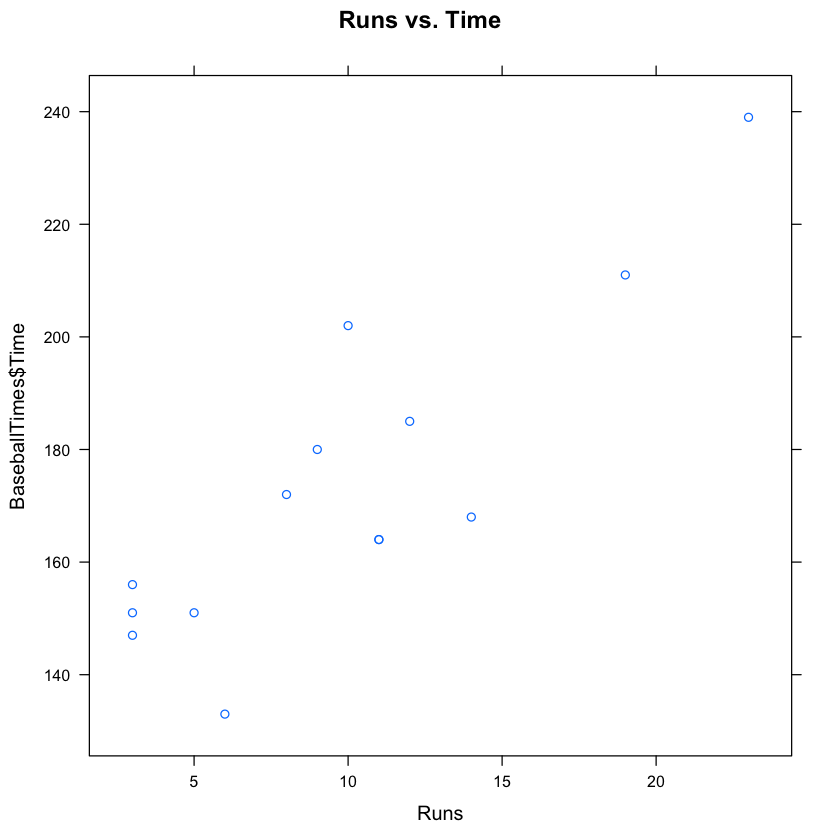

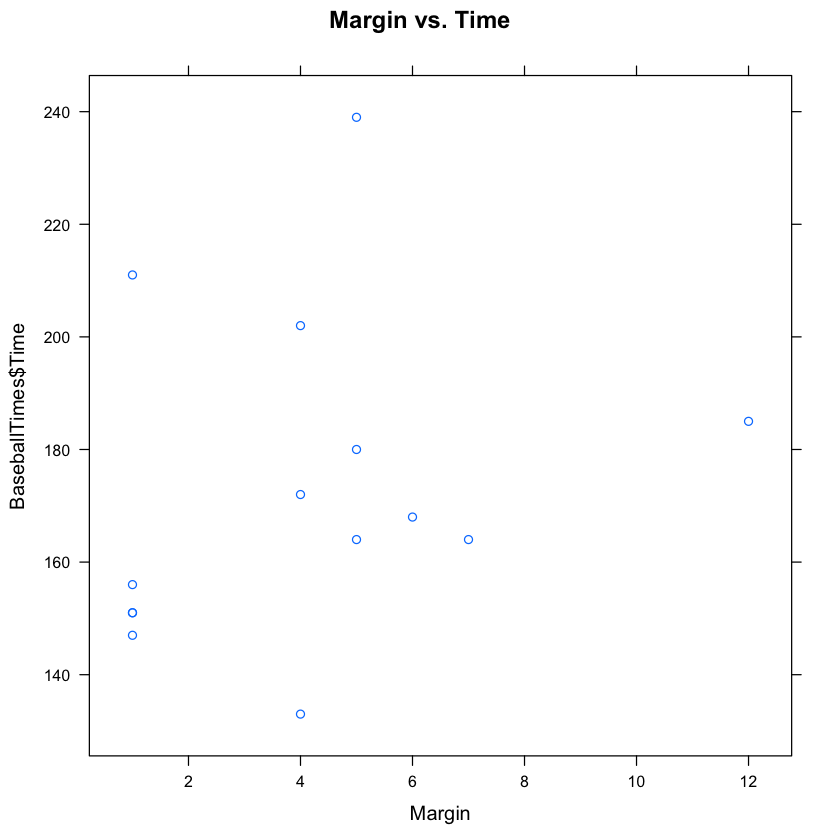

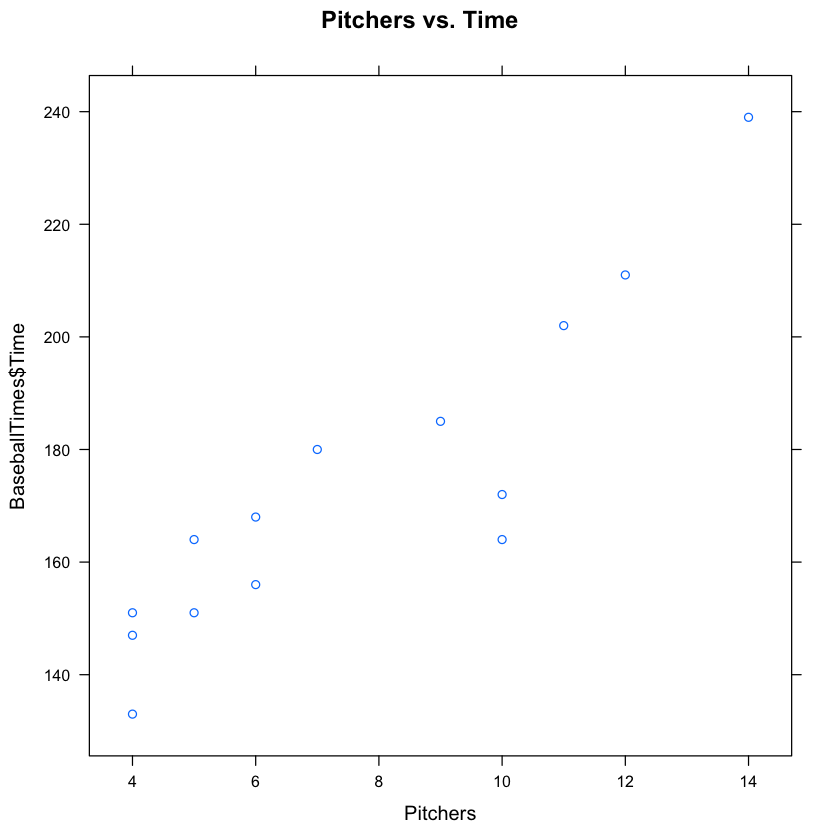

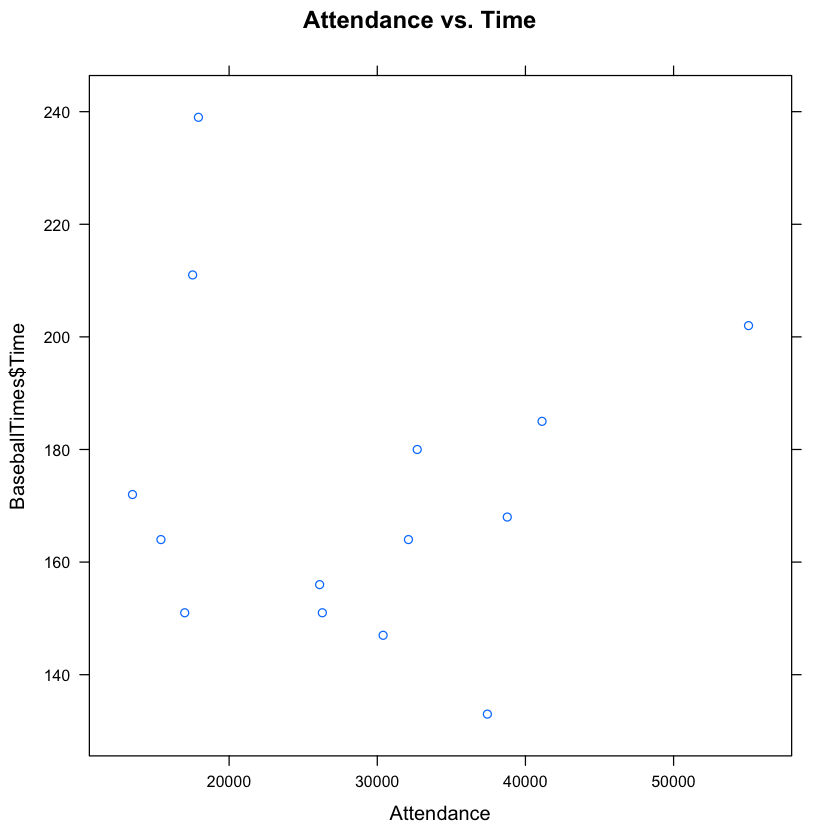

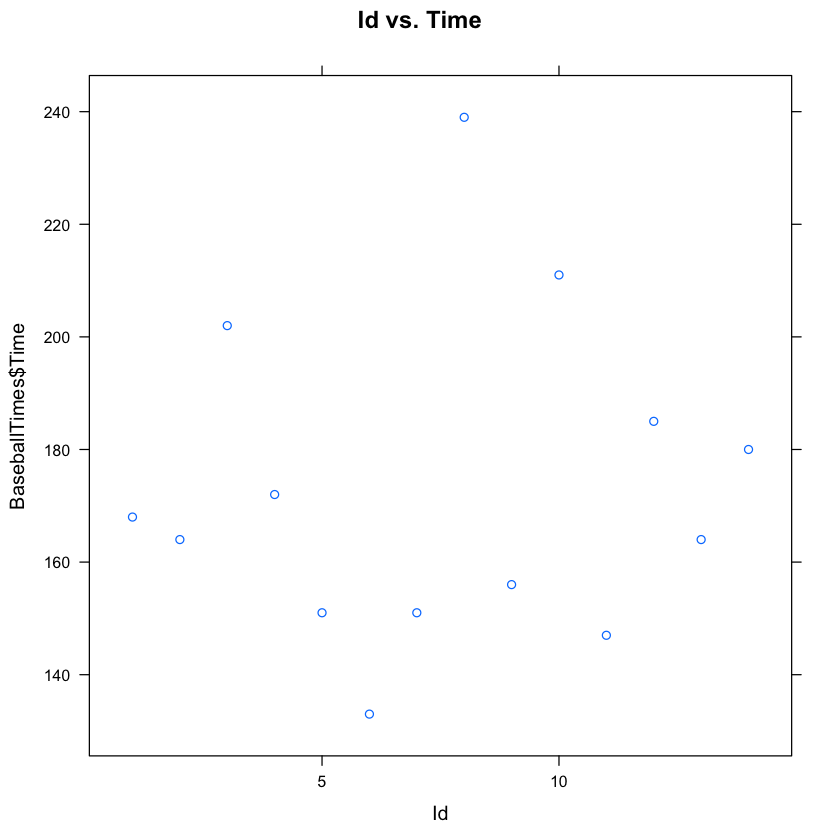

In [37]:
columns = colnames(BaseballTimes)
par(mfrow=c(1,3))
par(pin=c(2,2))
for(col in columns) {
    if(class(BaseballTimes[[col]]) == 'integer' && col != 'Time') {
        print(xyplot(BaseballTimes$Time ~ BaseballTimes[[col]], 
              main=paste(col, 'vs. Time'), xlab=col))
    }
}

In [34]:
pitchersTimeLm = lm(BaseballTimes$Time ~ BaseballTimes$Pitchers)
pitchersTimeLm


Call:
lm(formula = BaseballTimes$Time ~ BaseballTimes$Pitchers)

Coefficients:
           (Intercept)  BaseballTimes$Pitchers  
               113.869                   7.746  


# c) Regression equation: $\hat{y} = 113.86 + 7.746x$
# The slope coefficient means that time will increase by 7.746 minutes per Pitcher change. The intercept means that if no pitchers switched in the game, then the game would last on average 113.86 minutes

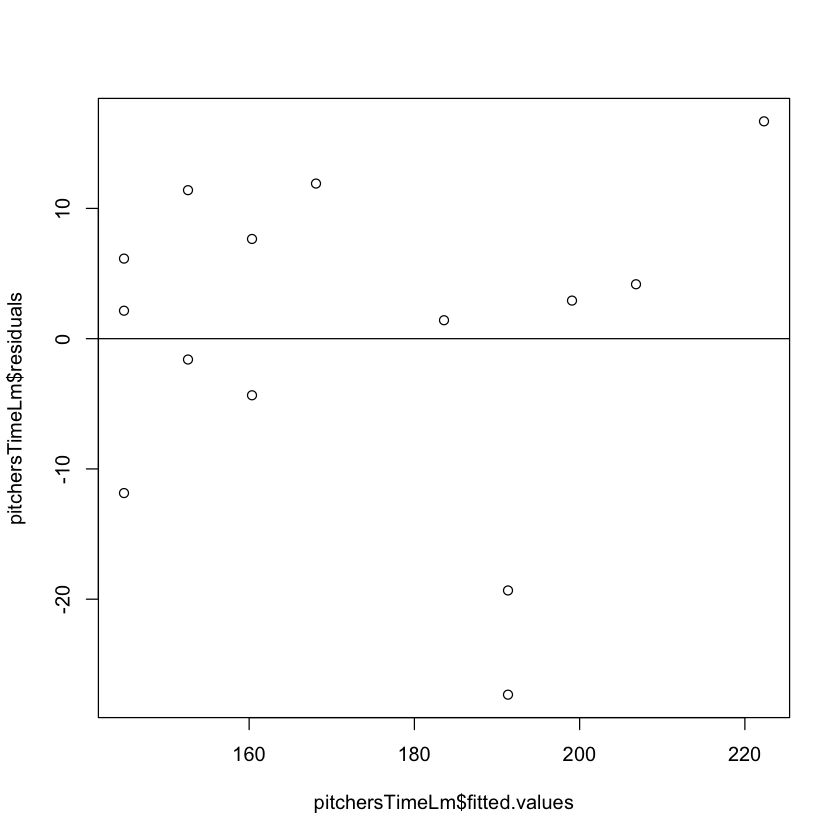

In [35]:
plot(pitchersTimeLm$fitted.values, pitchersTimeLm$residuals)
abline(h=0)

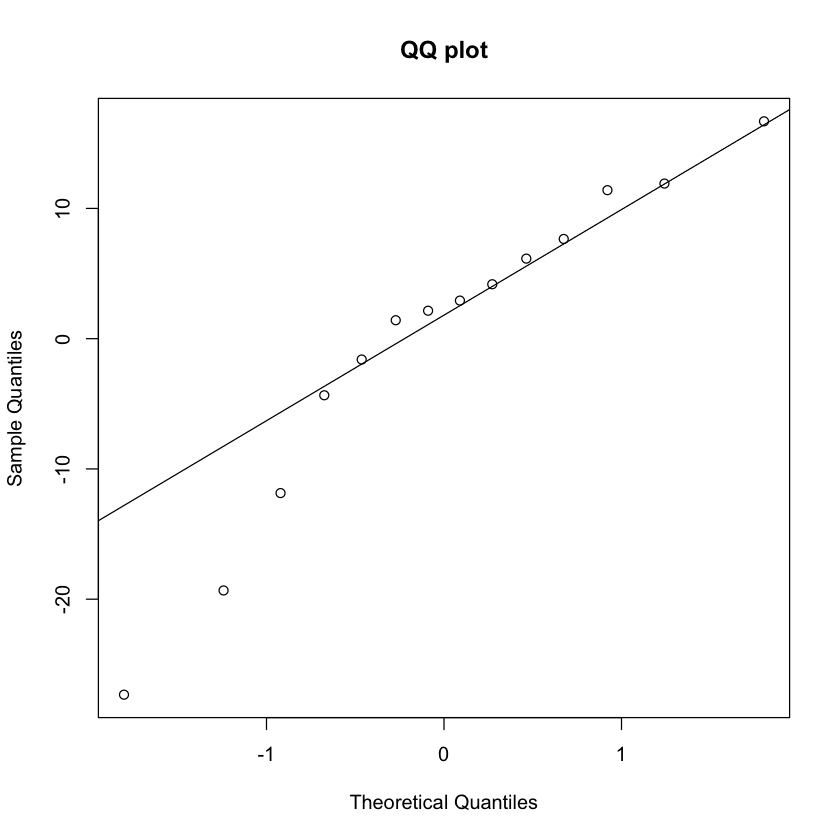

In [36]:
qqnorm(pitchersTimeLm$residuals, main='QQ plot')
qqline(pitchersTimeLm$residuals)

### b/c) Omitting the outlier made the plot of Pitcher vs Time more linear. The Residuals vs Fit plot shows roughly zero mean for the residuals. However, the QQ plot is still not following the normal line. Therefore, we cannot accept this analysis has questionable validity 